<a href="https://colab.research.google.com/github/vir097/Cardiovascular-Risk-Prediction--Viral-Shewale/blob/main/Cardiovascular_risk_prediction_Viral_Shewale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Tile: Cardiovascular Risk Prediction**

**Problem Statment:**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD).

**Data Description**

**Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

## **1. Load Dataset**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Viral/Cardiovascular Risk Prediction--Viral Shewale/data_cardiovascular_risk.csv",index_col='id')

## **2. Basic Inspection of the dataset**

In [4]:
# Get the head of the dataset
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Get the tail of the dataset
df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# get the shape of the dataset
df.shape

(3390, 16)

* **There are $3390$ rows and $16$ different attributes (columns) in the dataset.**

In [7]:
# columns in the dataset
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
# Describtion of the dataset
df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [9]:
# data type
df.dtypes

age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

## **3. Data Cleaning**

### **3.1. Checking for the null values.**

In [10]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**Null value columns:**

*     education 
*     cigsPerDay 
*     BPMeds     
*     totchol  
*     BMI
*     heartRate   
*     glucose   

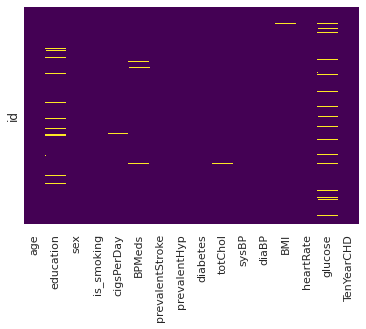

In [11]:
# Visualization of null values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### **3.2. Handling null values**

* The NaN values can be imputed by 
the aggregate (**mean or median**) of the remaining values in the columns.

**3.2.1. Handling NaN values from education column**


In [12]:
''' The NaN values can be imputed by 
the aggregate (mean or median) of the remaining values 
in the education column. '''

mean_ = round(df[~df['education'].isnull()]['education'].mean(),1)

median_ = df[~df['education'].isnull()]['education'].median()

[mean_, median_]

[2.0, 2.0]

* **The mean and median are the same. Hence we can use either one to replace with null values.**

In [13]:
# Handling NaN values from education column
df['education'].fillna(value= mean_ , inplace=True)

**3.2.2. Handling NaN values from cigarettes per day column**


In [14]:
# cig_per_day
cig_mean = round(df[~df['cigsPerDay'].isnull()]['cigsPerDay'].mean(),1)

cig_median = df[~df['cigsPerDay'].isnull()]['cigsPerDay'].median()

[cig_mean, cig_median]

[9.1, 0.0]

In [15]:
df[df.cigsPerDay == 0].shape

(1703, 16)

In [16]:
df.is_smoking.value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

* **We find that for every instance of missing values in cigaretts per day, the patients reported that they smoke.**

In [17]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
cig_mean2 = df[df['is_smoking']=='YES']['cigsPerDay'].mean()
cig_median2 = df[df['is_smoking']=='YES']['cigsPerDay'].median()

[cig_mean2, cig_median2]

[18.345945945945946, 20.0]

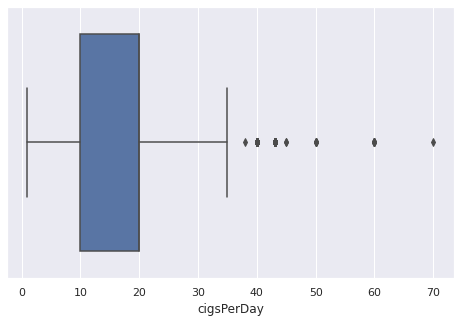

In [18]:
# box plot for the number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(8,5))
df1=df[df['cigsPerDay']>0]
sns.boxplot(df1['cigsPerDay'])

* **The number of cigarettes smoked by the patients who smoke contains outliers. Hence, the missing values in the cigarettes per day column can be replaced with its median value.**

In [19]:
# Handling NaN values from cigarettes per day column
df['cigsPerDay'].fillna(value= cig_median2 , inplace=True)

**3.2.3. Handling NaN values from BPMeds column**


In [20]:
df.BPMeds.value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [21]:
mode = df.BPMeds.mode()
mode

0    0.0
dtype: float64

* **Replacing the null values of BPMeds with most frequent entry.**

In [22]:
df['BPMeds'].fillna(value=0, inplace=True)

**3.2.4. Handling NaN values from Total cholesterol column**

In [23]:
chol_mode = df['totChol'].mean()
chol_mode

237.07428400954655

In [24]:
chol_median=df['totChol'].median()
chol_median

234.0

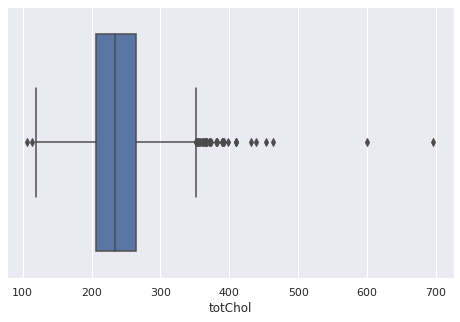

In [25]:
plt.figure(figsize=(8,5))
df1=df[df['totChol']>0]
sns.boxplot(df1['totChol'])

In [26]:
df[df['totChol']>350].shape

(43, 16)

In [27]:
df['totChol'].fillna(value=chol_median, inplace=True)

**3.2.5. Handling NaN values from BMI column**

In [28]:
BMI_mean = df.BMI.mean()
BMI_median = df.BMI.median()
[BMI_mean,BMI_median]

[25.7949644549763, 25.38]

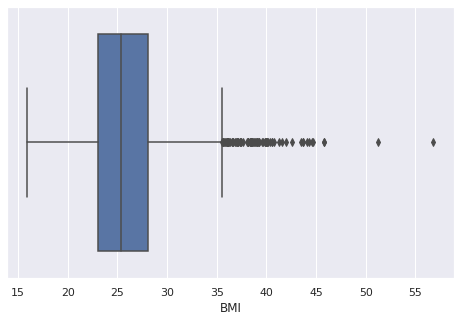

In [29]:
plt.figure(figsize=(8,5))
df1=df[df['BMI']>0]
sns.boxplot(df1['BMI'])

In [30]:
df['BMI'].fillna(value=BMI_median, inplace=True)

**3.2.6. Handling NaN values from glucose column**

In [31]:
glu_mean = df.glucose.mean()
glu_mean

82.08651976668827

In [32]:
glu_median = df.glucose.median()
glu_median

78.0

In [33]:
df.glucose.mode()

0    75.0
dtype: float64

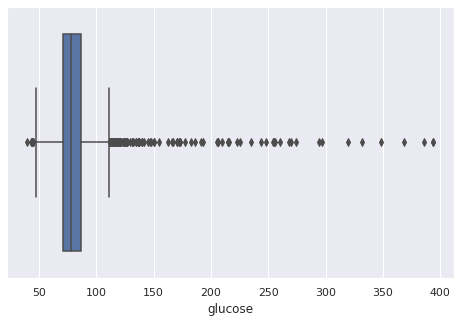

In [34]:
plt.figure(figsize=(8,5))
df1=df[df['glucose']>0]
sns.boxplot(df1['glucose'])

In [35]:
df[df['glucose']>150].shape

(42, 16)

In [36]:
df['glucose'].fillna(value=glu_median,inplace=True)

In [37]:
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [38]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## **4. Exploratory Data Analysis (EDA)**

### **4.1. Distribution of dependent variable**

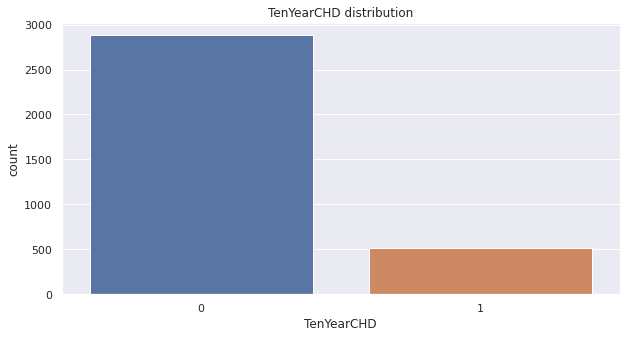

In [39]:
# distribution of TenYearCHD
plt.figure(figsize=(10,5))
sns.countplot(x=df['TenYearCHD'])
plt.title('TenYearCHD distribution')
plt.show()

In [40]:
df.TenYearCHD.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [41]:
511/(2879+511)

0.15073746312684366

* The dependent variable - 10 year risk of CHD is **Imbalanced**.
* Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations
* Only 15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.

### **4.2. Distribution of Independent continuous variable.**

In [42]:
continuous_variable= ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

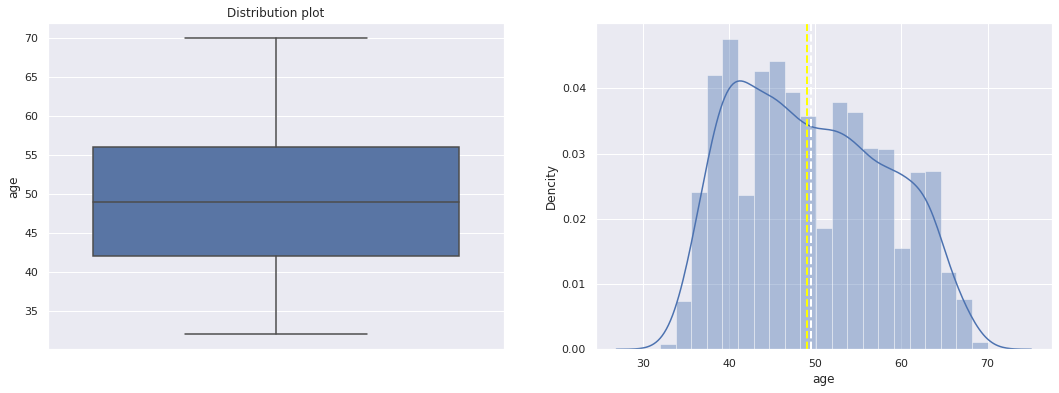

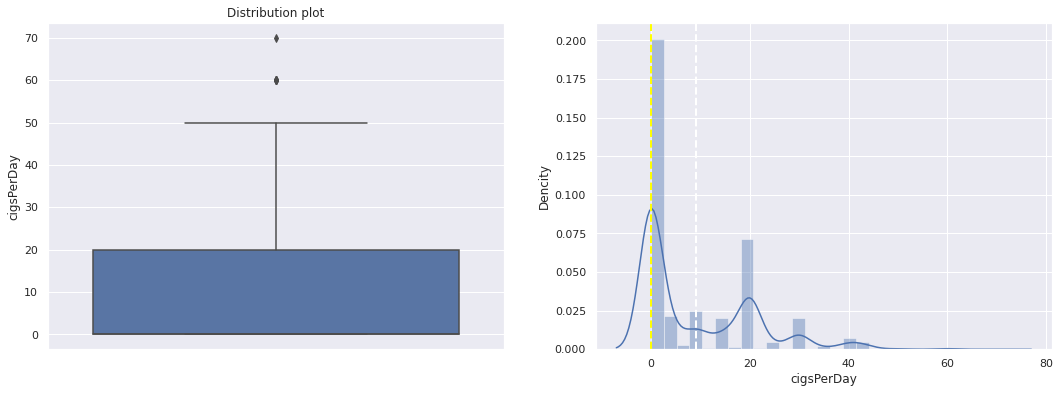

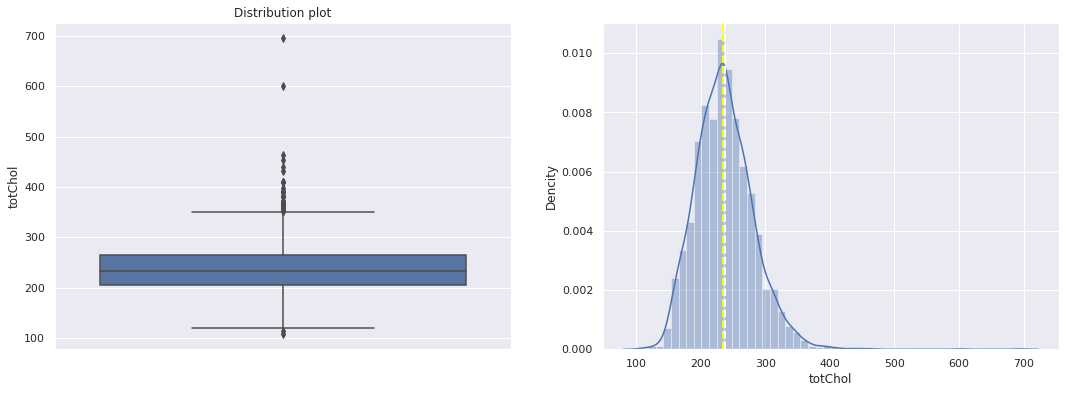

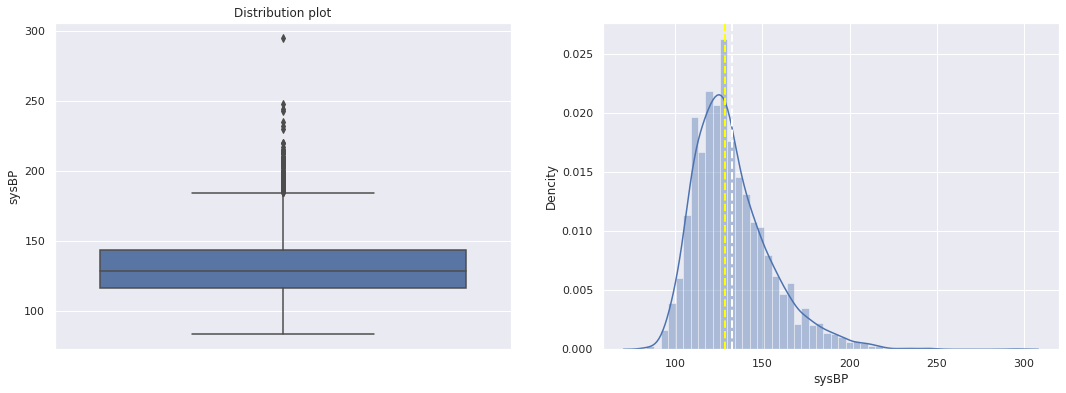

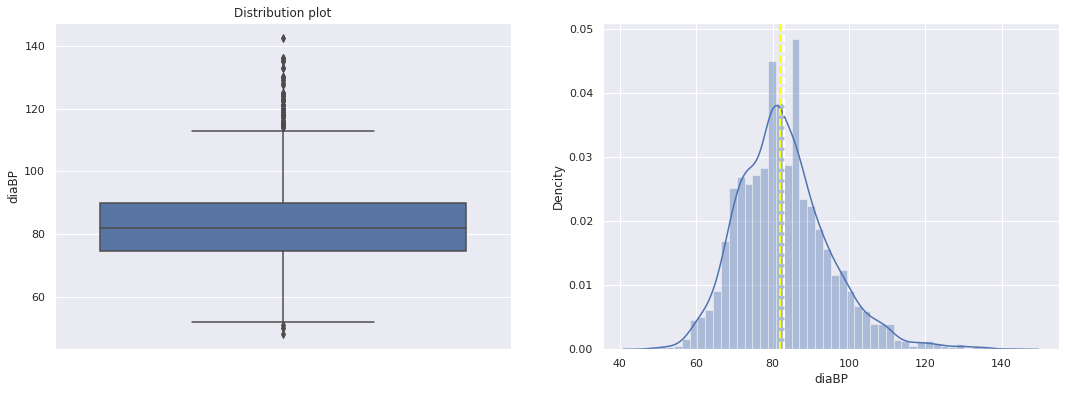

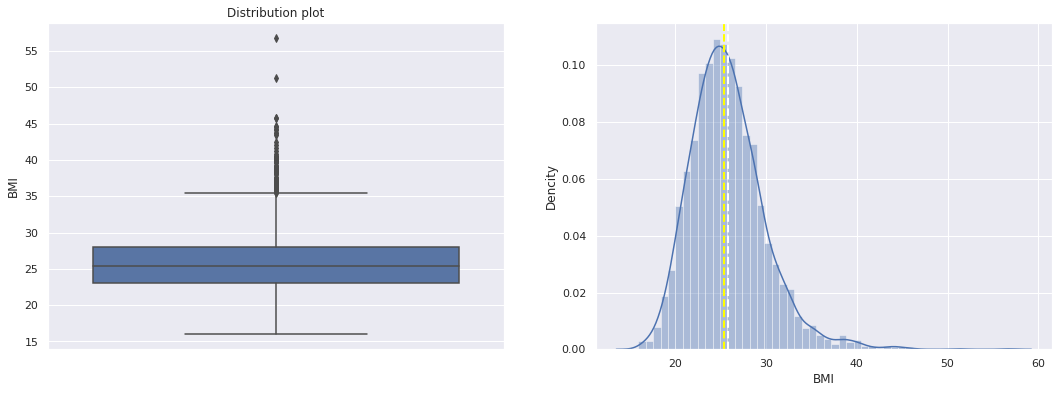

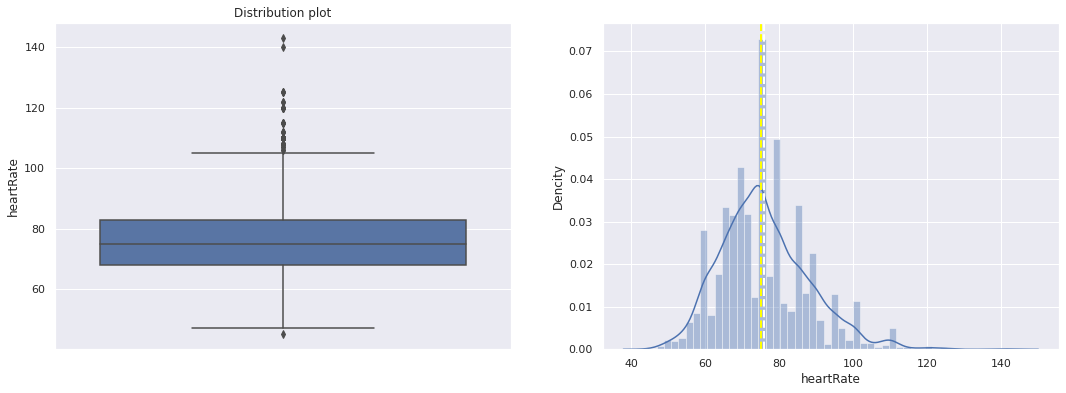

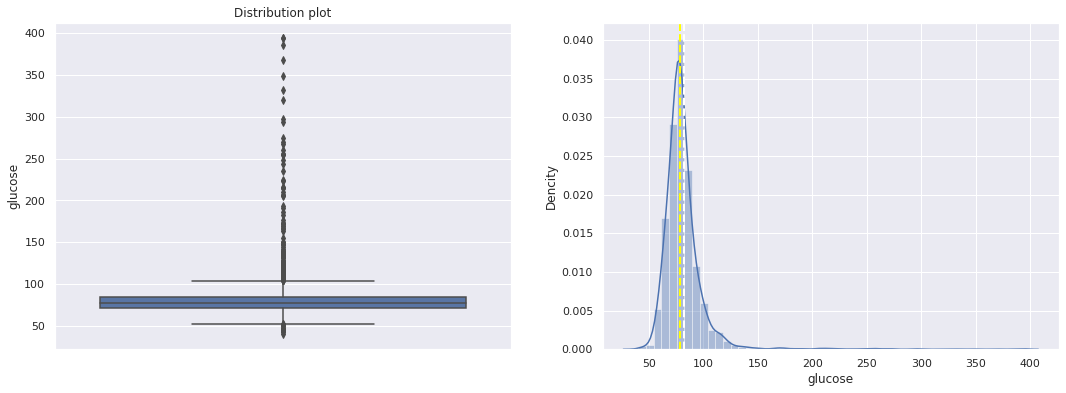

In [43]:
for var in continuous_variable:
    plt.figure(figsize=(18,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var])
    fig.set_title('Distribution plot')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var].dropna())
    plt.axvline(df[var].mean(), color='white', linestyle='dashed', linewidth=2)
    plt.axvline(df[var].median(), color='yellow', linestyle='dashed', linewidth=2)
    fig.set_ylabel('Dencity')
    fig.set_xlabel(var)

    plt.show()

* The distribution of several features is **skewed**, and **contains outliers.**

### **4.3. Visulizating relation between Dependent variable and Independent continuous variable.**

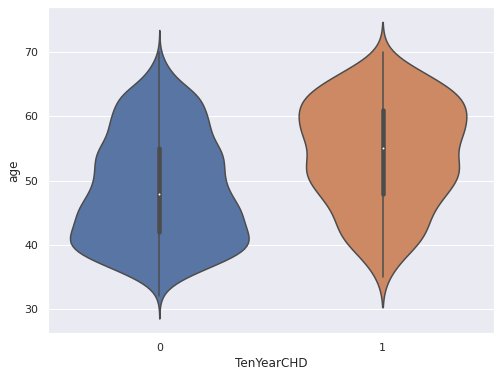

In [44]:
# TenYearCHD vs age
plt.figure(figsize=(8,6))
sns.violinplot(x='TenYearCHD',y='age',data=df,size=6)

* **From the above observation, we can see that the older person has a higher chance of Cardiovascular risk.**
* **A younger person has less chance of Cardiovascular risk.**

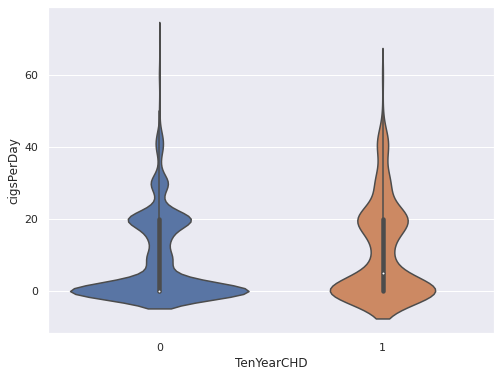

In [45]:
# TenYearCHD vs cigsPerDay
plt.figure(figsize=(8,6))
sns.violinplot(x='TenYearCHD',y='cigsPerDay',data=df,size=6)

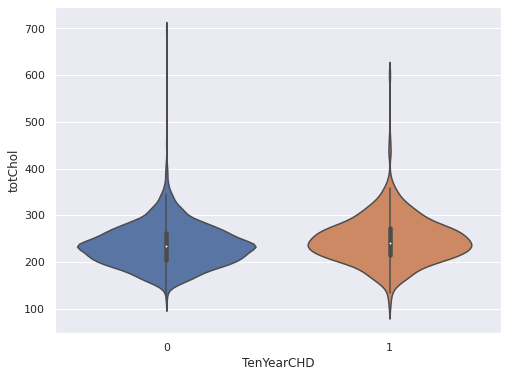

In [46]:
# TenYearCHD vs totChol
plt.figure(figsize=(8,6))
sns.violinplot(x='TenYearCHD',y='totChol',data=df,size=6)

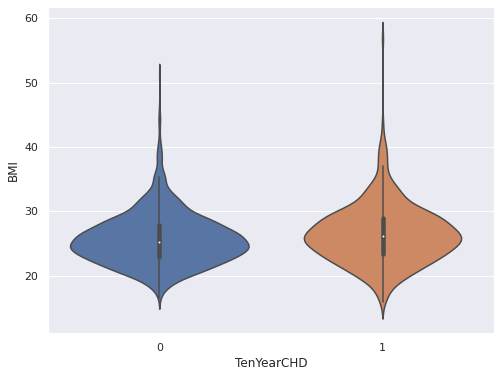

In [47]:
# TenYearCHD vs BMI
plt.figure(figsize=(8,6))
sns.violinplot(x='TenYearCHD',y='BMI',data=df,size=6)

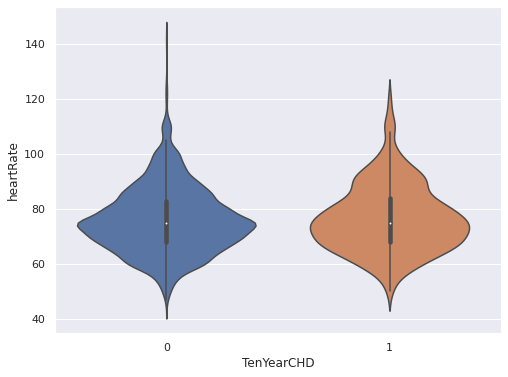

In [48]:
# TenYearCHD vs heartRate
plt.figure(figsize=(8,6))
sns.violinplot(x='TenYearCHD',y='heartRate',data=df,size=6)

* **There is no conclusive evidence that we can conclude from continuous variables:.**

In [49]:
dependent_variable = df['TenYearCHD']

### **4.4. The distribution of the discrete independent variables:**

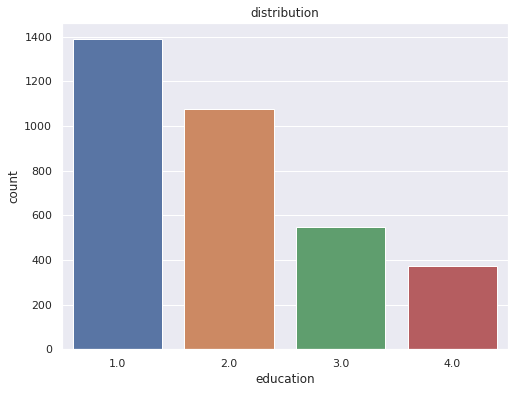

In [60]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['education'])
plt.title('distribution')
plt.show()

* **Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.**

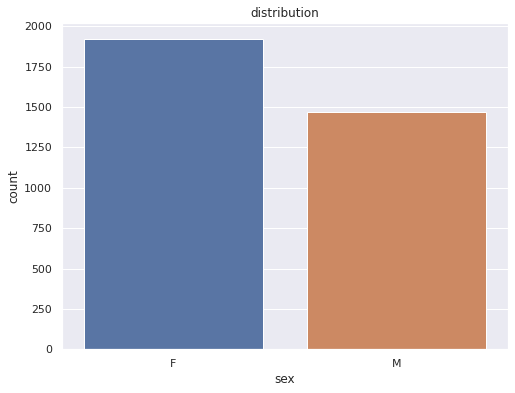

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['sex'])
plt.title('distribution')
plt.show()

* **There are more female patients compared to male patients.**

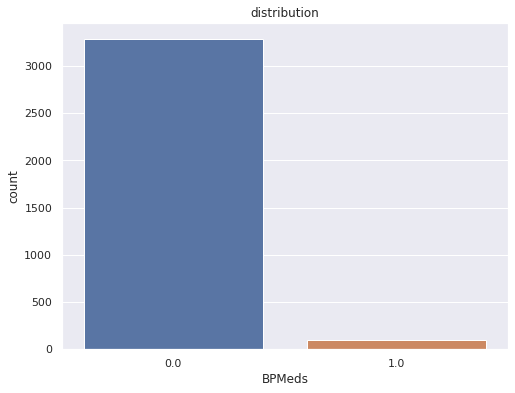

In [52]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['BPMeds'])
plt.title('distribution')
plt.show()

In [53]:
df.BPMeds.value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

* **$100$ patients are taking blood pressure medicine.** 

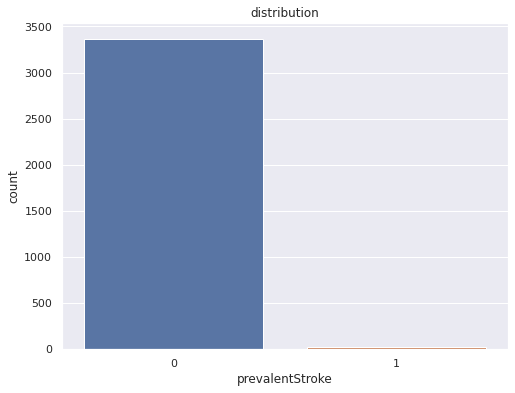

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['prevalentStroke'])
plt.title('distribution')
plt.show()

In [55]:
df.prevalentStroke.value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

* **$22$ patients under the study have experienced a stroke.**

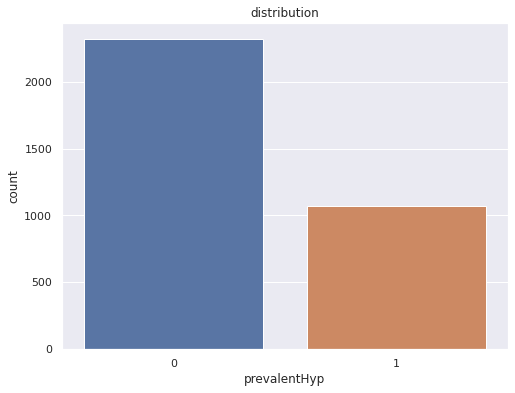

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['prevalentHyp'])
plt.title('distribution')
plt.show()

In [57]:
df.prevalentHyp.value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

* **$1069$ patients have hypertension.**

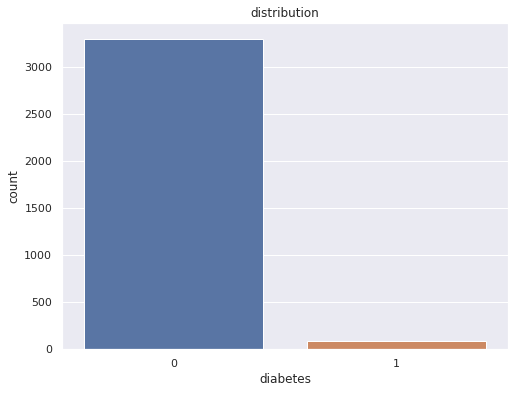

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['diabetes'])
plt.title('distribution')
plt.show()

In [59]:
df.diabetes.value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

* **$87$ patients have diabetes.**